# The Enron Case

### Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded by Kenneth Lay as a merger between Houston Natural Gas and InterNorth in 1985.
### Although it started as an energy company, it was involved in so many complex things that people didn’t understand what exactly the company did, and as Bethnay McLean asked “How exactly does Enron make its money?”.

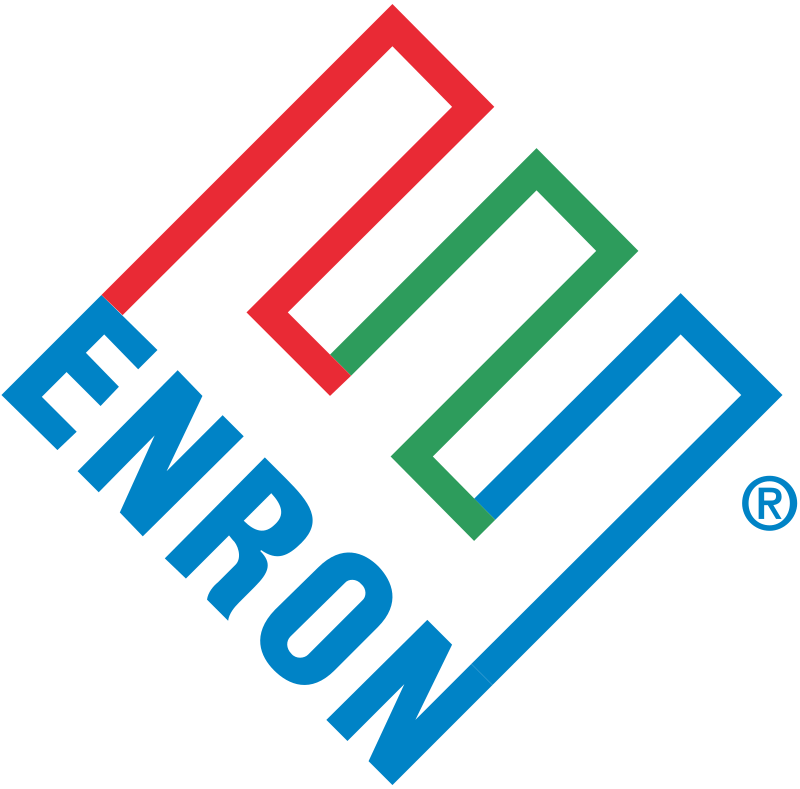

### Enron was fantastic! Very attractive to investors and the fastest growing company making money at a rate no one has ever seen before. They were the Wall Street darlings, a company that could never lose. It was well-connected politically, was making money at an incredible rate, and seemed to be the leading innovative company and very profitable investment. Fortune named Enron “America’s Most Innovative Company” for six consecutive years.
### Jeffrey Skilling was hired by Kenneth Lay in 1990 as chairman and chief executive officer of Enron Finance Corp. In 1992, Skilling devised a new accounting technique called the Mark to Market, under which the value of the asset could be adjusted on the balance sheet from its historical cost up to the fair market value, and the difference be captured as the gain or revenue. So under this technique, projected revenue was captured as revenue of today and Enron reaped billions. The company’s share prices went up from $10/share to around $80/share from 1999 – 2000. Enron was also guilty of setting up side companies and moving the debts to the new companies' financial records.
### Enron was thus portrayed as a very profitable investment when all numbers on the financial statements were illusionary and fake!
### Enron filed for bankruptcy on December 2, 2001. Arthur Anderson, one of the “Big Five” accounting firms, which audited the financial statements was dissolved as a result of the Enron scandal.

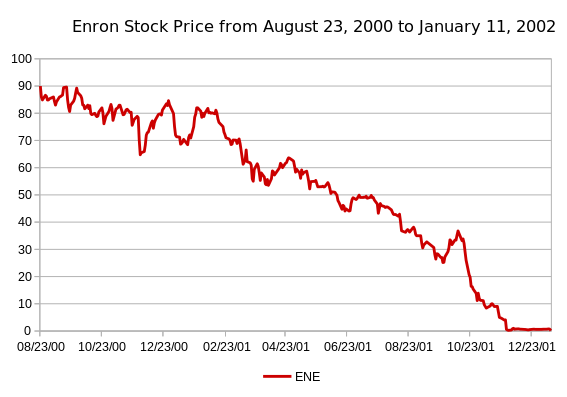

# The Enron Dataset

### The Enron email and financial datasets are big, messy treasure troves of information, which become much more useful once you know your way around them a bit. Enron’s complete data may be downloaded from this link 
https://www.cs.cmu.edu/~./enron/

# Size of the Enron Dataet

In [11]:
import sys
sys.path.append("C:/Users/BATCOMPUTER/Desktop/Udacity/ud120-projects-master/tools")
sys.path.append('C:/Users/BATCOMPUTER/Desktop/Udacity/ud120-projects-master/choose_your_own')
sys.path.append('C:/Users/BATCOMPUTER/Desktop/Udacity/ud120-projects-master/datasets_questions')

import os
os.chdir('C:/Users/BATCOMPUTER/Desktop/Udacity/ud120-projects-master/datasets_questions')

import joblib

enron_data = joblib.load(open("../final_project/final_project_dataset.pkl", "rb"))
print('Number of people in the Enron dataset: {0}'.format(len(enron_data)))

Number of people in the Enron dataset: 146


In [22]:
import sys
import math
import numpy as np 
import _pickle as pickle
sys.path.append("../tools/")
import pickle
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit

# Features in the Enron Dataset

In [15]:
first_item = list(enron_data.keys())[0]
print(enron_data[first_item].keys())

dict_keys(['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'])


In [16]:
print(len(enron_data[first_item].keys()))

21


# Finding POI's in the Enron Data

### Let us explore the ‘poi’ feature. POI stands for “Person of Interest” and includes all the people who are indicted, charged with crime, and people who settled without admitting guilt and testified in exchange for immunity from prosecution in the Enron Scandal.

In [17]:
people = 0
poiCount = 0
for person in enron_data:
    people = people + 1
    if enron_data[person]['poi'] == 1:
        poiCount += 1
print("No of POI:", poiCount)

No of POI: 18


# No. of POI's in the text file

In [18]:
poiFile = open("C:/Users/BATCOMPUTER/Desktop/Udacity/Enron-Case-main/poi_names.txt")
poiCount2 = 0
lines = poiFile.readlines() 
for line in lines:
    if line[0] == '(':
        poiCount2 += 1
print("Total POIs:",poiCount2)

Total POIs: 35


# Data Exploarion on different persons in the enron_data dictionary

In [19]:
jeffrey_k_skilling = enron_data['SKILLING JEFFREY K']
print(jeffrey_k_skilling)
print("Skilling's Salary:", enron_data["SKILLING JEFFREY K"]["salary"])
print("Skilling's Bonus", enron_data["SKILLING JEFFREY K"]["bonus"])
print("Skilling's Total Stocks Value", enron_data["SKILLING JEFFREY K"]["total_stock_value"])
print("Lay's Salary:", enron_data["LAY KENNETH L"]["salary"])
print("Lay's Bonus", enron_data["LAY KENNETH L"]["bonus"])
print("Lay's Total Stocks Value", enron_data["LAY KENNETH L"]["total_stock_value"])

{'salary': 1111258, 'to_messages': 3627, 'deferral_payments': 'NaN', 'total_payments': 8682716, 'loan_advances': 'NaN', 'bonus': 5600000, 'email_address': 'jeff.skilling@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 26093672, 'expenses': 29336, 'from_poi_to_this_person': 88, 'exercised_stock_options': 19250000, 'from_messages': 108, 'other': 22122, 'from_this_person_to_poi': 30, 'poi': True, 'long_term_incentive': 1920000, 'shared_receipt_with_poi': 2042, 'restricted_stock': 6843672, 'director_fees': 'NaN'}
Skilling's Salary: 1111258
Skilling's Bonus 5600000
Skilling's Total Stocks Value 26093672
Lay's Salary: 1072321
Lay's Bonus 7000000
Lay's Total Stocks Value 49110078


# Number of people havig quantified salary

### 95 people from the 146 persons in enron_data have a quantified salary. The rest have NaN values in their salary features. This may pose problems while applying regression so we will remove them.

In [20]:
people = 0
have_quantified_salary = 0
for person in enron_data:
    people = people + 1
    if enron_data[person]['salary'] != 'NaN':
            have_quantified_salary += 1
print(have_quantified_salary)


95


# Plotting Salary Histogram

(array([ 8., 22., 45., 13.,  2.,  1.,  0.,  0.,  0.,  3.]),
 array([4.7700000e+02, 1.1155510e+05, 2.2263320e+05, 3.3371130e+05,
        4.4478940e+05, 5.5586750e+05, 6.6694560e+05, 7.7802370e+05,
        8.8910180e+05, 1.0001799e+06, 1.1112580e+06]),
 <BarContainer object of 10 artists>)

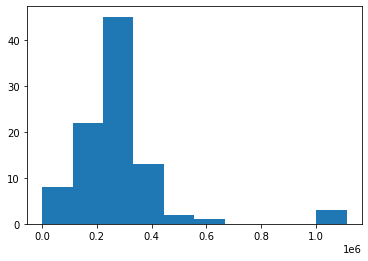

In [23]:
feature1 = ["salary"]
enron_data.pop('TOTAL', 0)
salary = featureFormat(enron_data, feature1)
counts, bins = np.histogram(salary)
plt.hist(bins[:-1], bins, weights=counts)

### As can be seen, most of the employees had their salaries within the $0.1M — $0.3M range. We have a few outliers here as well. As can be seen, these are the data points for receiving salaries greater than 1 million USD.

# Printing outliers in Salary array

In [24]:
for x in salary:
    if x>1000000 :
        print("Outlier:", x)
for person in enron_data:
    if enron_data[person]["salary"] == 1072321:
        print(person)
    if enron_data[person]["salary"] == 1111258:
        print(person)
    if enron_data[person]["salary"] == 1060932:
        print(person)

Outlier: [1072321.]
Outlier: [1111258.]
Outlier: [1060932.]
LAY KENNETH L
SKILLING JEFFREY K
FREVERT MARK A


# Plotting Bonus Histogram

(array([49., 18.,  4.,  5.,  0.,  1.,  2.,  0.,  1.,  1.]),
 array([  70000.,  863000., 1656000., 2449000., 3242000., 4035000.,
        4828000., 5621000., 6414000., 7207000., 8000000.]),
 <BarContainer object of 10 artists>)

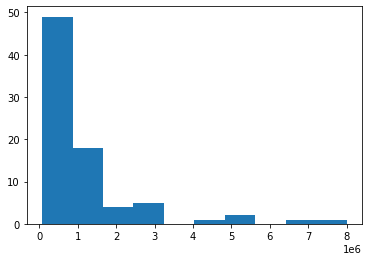

In [25]:
feature2 = ["bonus"]
enron_data.pop('TOTAL', 0)
bonus = featureFormat(enron_data, feature2)
counts, bins = np.histogram(bonus)
plt.hist(bins[:-1], bins, weights=counts)

# Printing outliers in Bonus array

In [26]:
for x in bonus:
    if x>5000000 :
        print("Outlier:", x)
for person in enron_data:
    if enron_data[person]["bonus"] == 8000000:
        print(person)
    if enron_data[person]["bonus"] == 7000000:
        print(person)
    if enron_data[person]["bonus"] == 5249999:
        print(person)
    if enron_data[person]["bonus"] == 5600000:
        print(person)

Outlier: [8000000.]
Outlier: [7000000.]
Outlier: [5249999.]
Outlier: [5600000.]
LAVORATO JOHN J
LAY KENNETH L
BELDEN TIMOTHY N
SKILLING JEFFREY K


### Hence, Lavorato John J, Lay Kenneth L, Belden Timothy N and Skilling Jeffrey K are the 4 people who earned the highest bonuses during their employment at Enron. What’s interesting is that although Lay and Skilling have been known for their fraud, we get additional 2 persons.

# Finding POIs from the salary and bonus outliers

In [27]:
if enron_data["LAVORATO JOHN J"]["poi"] == 1:
    print("John J Lavorato is a Person of Interest (POI)")
if enron_data["LAY KENNETH L"]["poi"] == 1:
    print("Kenneth L Lay is a Person of Interest (POI)")
if enron_data["BELDEN TIMOTHY N"]["poi"] == 1:
    print("Timothy N Belden is a Person of Interest (POI)")
if enron_data["SKILLING JEFFREY K"]["poi"] == 1:
    print("Jeffrey K Skilling is a Person of Interest (POI)")

Kenneth L Lay is a Person of Interest (POI)
Timothy N Belden is a Person of Interest (POI)
Jeffrey K Skilling is a Person of Interest (POI)


# Plotting Scatterplot for Data Visualization

In [28]:
enron_data.pop('TOTAL', 0)
features_list = ["bonus", "salary"]
data = featureFormat(enron_data, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [29]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

# Building the Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)
coef = reg.coef_
intercept = reg.intercept_
print('Slope: {}, Intercept: {}'.format(coef, intercept))
training_score = reg.score(feature_train, target_train)
test_score = reg.score(feature_test, target_test)
print('Score when same data is used to train and test: {}'.format(training_score))
print('Score when separate test data is used: {}'.format(test_score))

Slope: [3.64343028], Intercept: 153466.1952376156
Score when same data is used to train and test: 0.18125472866998515
Score when separate test data is used: 0.38802662124983744


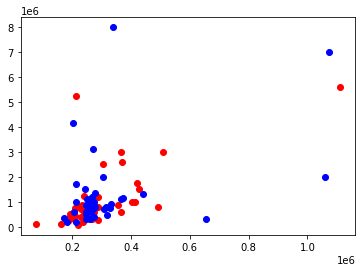

In [31]:
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 
### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### As can be seen, the data has been divided equally between testing and training data and are colored in the scatterplot for visualization purposes.

No handles with labels found to put in legend.


Slope of new regression line fitted on test data: [5.16798034]


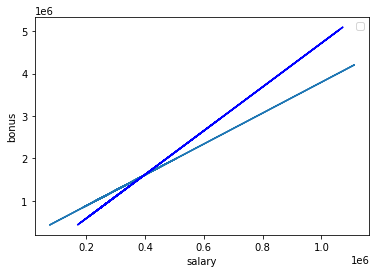

In [32]:
### Drawing the Regression Line on the Scatter PLot
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test)
new_coef = reg.coef_
print('Slope of new regression line fitted on test data: {}'.format(new_coef))
plt.plot(feature_train, reg.predict(feature_train), color="b") 
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

### When we have predicted the regression line, and know the slope as well as the new intercept, we can now predict the bonuses of people at Enron based on the salary they receive.